# 1.

## correlation matrix

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data = pd.read_csv('Country-data.csv')

In [8]:
data.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
154,Turkmenistan,62.0,76.30,2.50,44.5,9940,2.310,67.9,2.83,4440
163,Venezuela,17.1,28.50,4.91,17.6,16500,45.900,75.4,2.47,13500
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482
148,Thailand,14.9,66.50,3.88,60.8,13500,4.080,76.6,1.55,5080
13,Barbados,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000
85,Latvia,7.8,53.70,6.68,55.1,18300,-0.812,73.1,1.36,11300
120,Philippines,31.9,34.80,3.61,36.6,5600,4.220,69.0,3.16,2130
105,Morocco,33.5,32.20,5.20,43.0,6440,0.976,73.5,2.58,2830
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758
134,Slovak Republic,7.0,76.30,8.79,77.8,25200,0.485,75.5,1.43,16600


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
data.shape

(167, 10)

In [13]:
country = data['country']
data.drop('country', axis= 1, inplace= True)

In [14]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


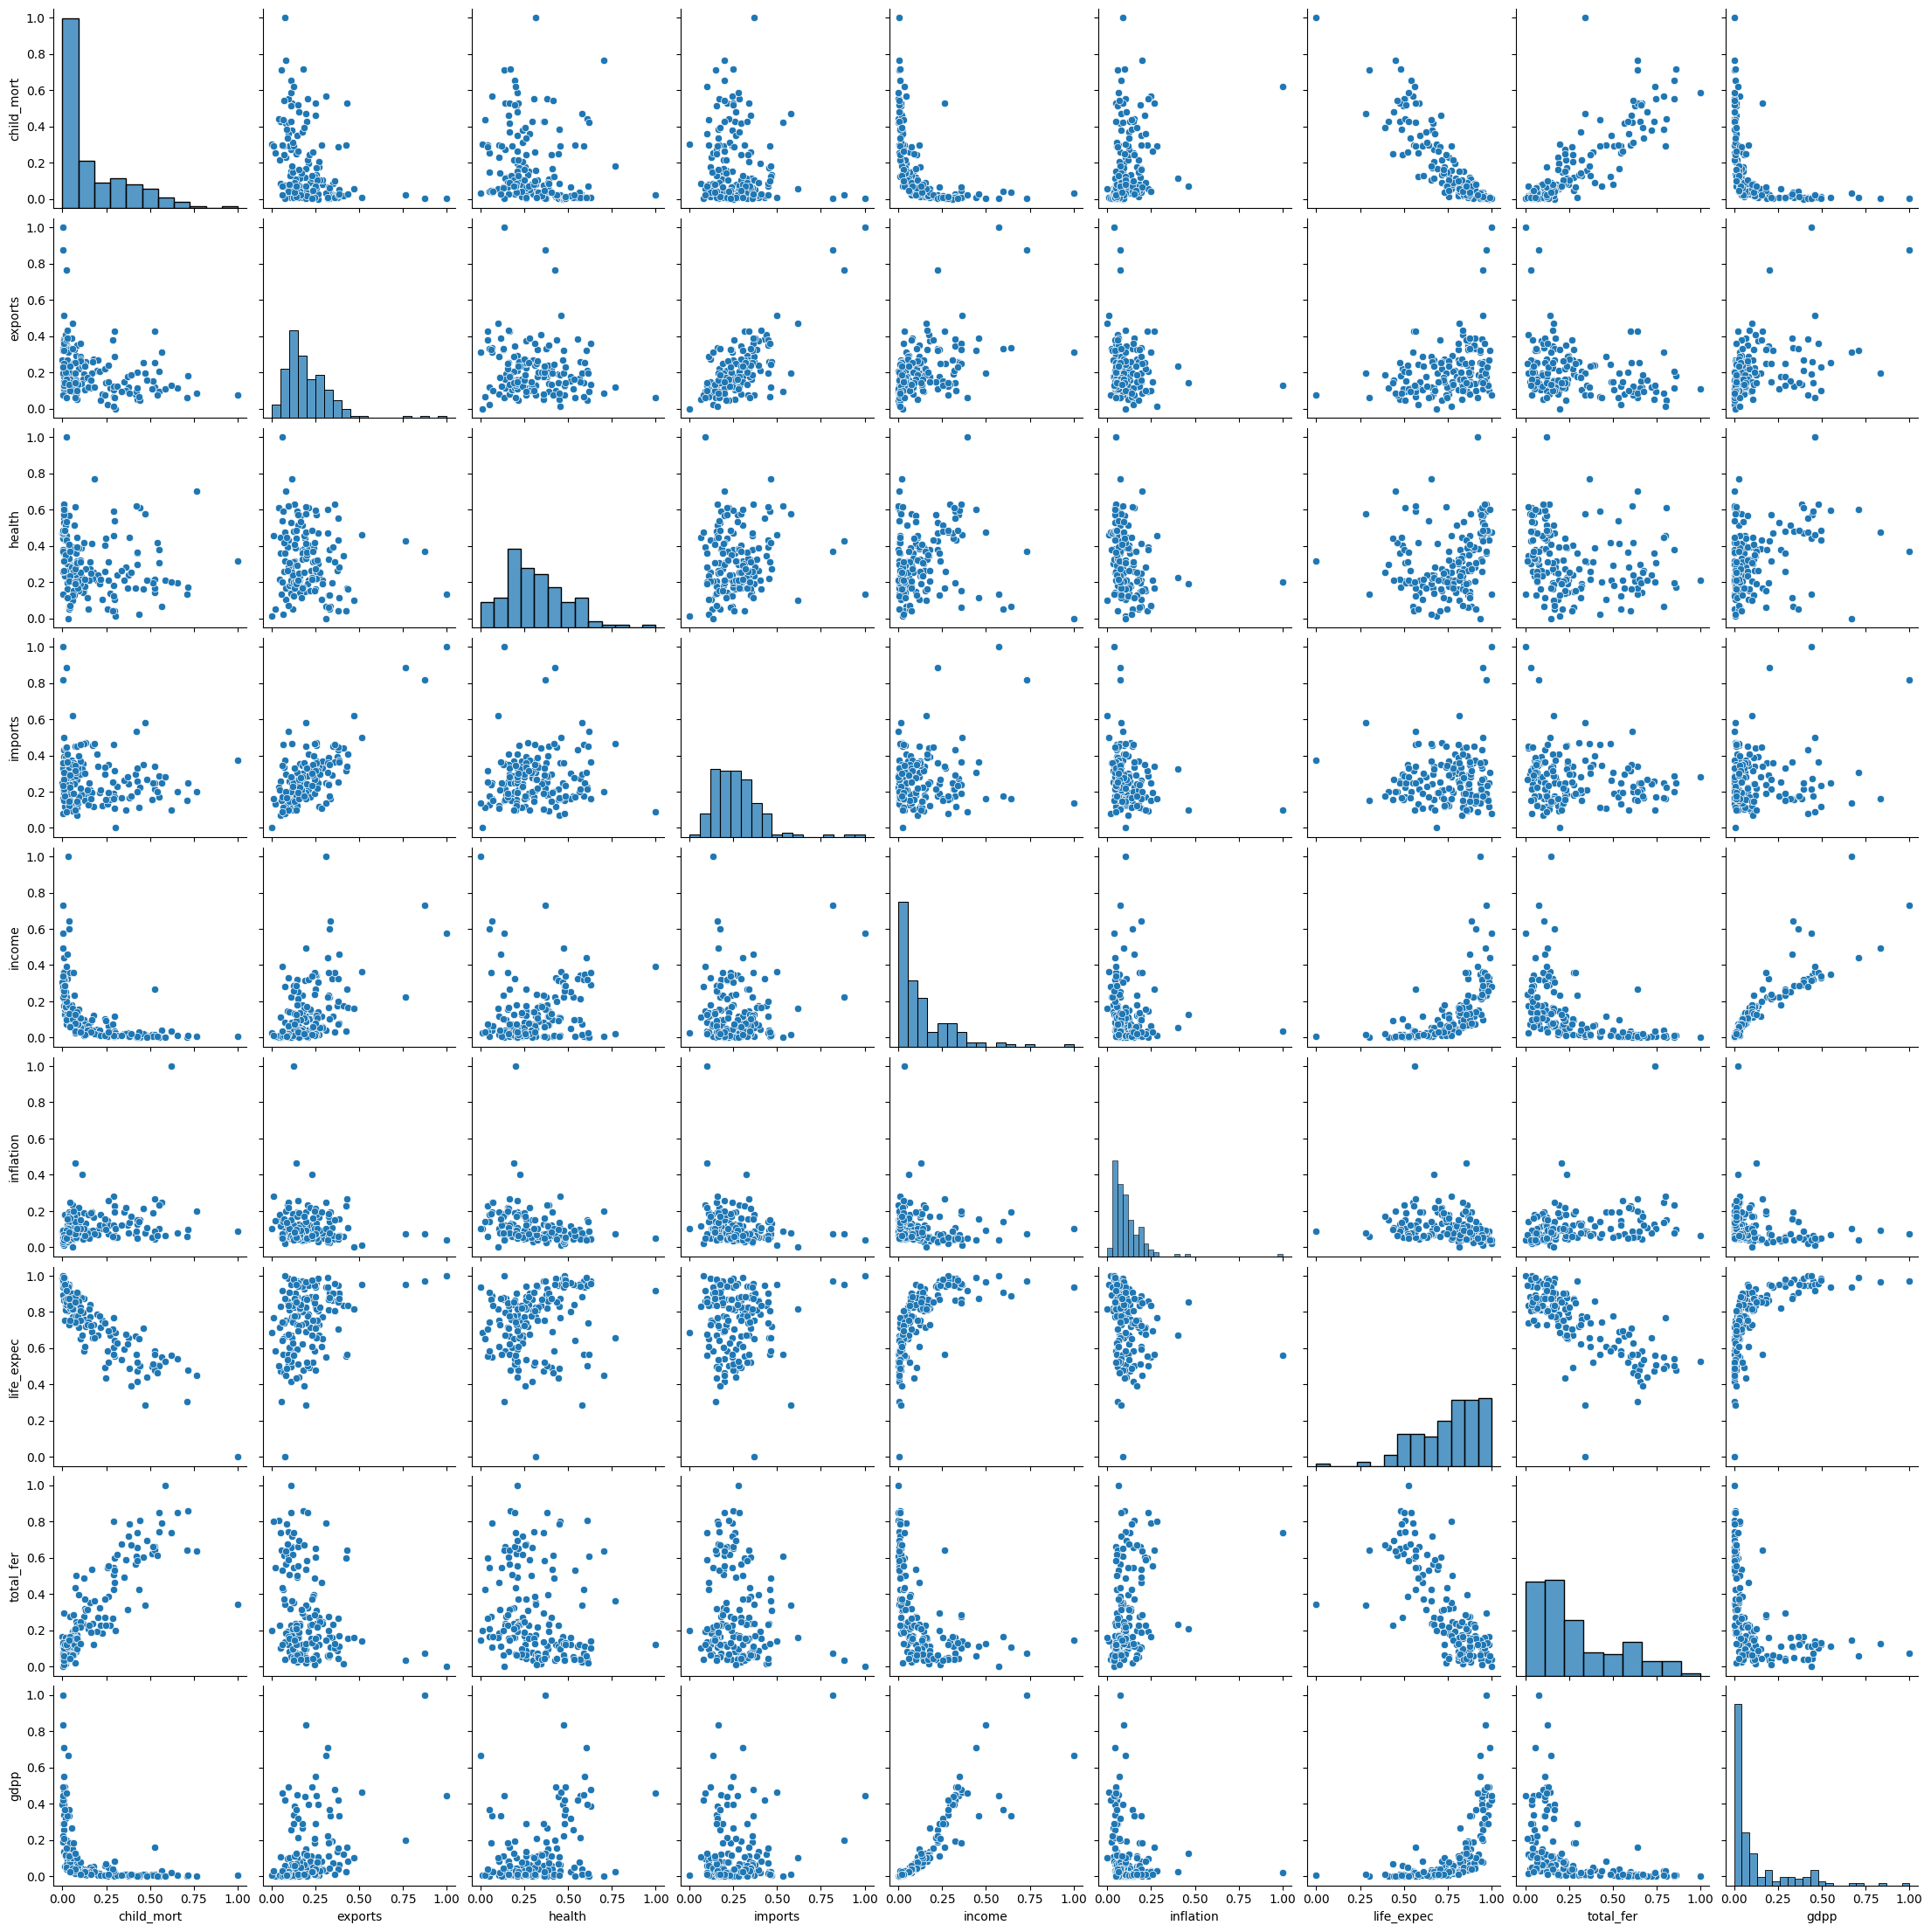

In [55]:
sns.pairplot(data)

# 2.

## data normalization 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
features = list(data.columns)

In [17]:
features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [18]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

### data after normalization 

In [19]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


# 3.

## Clustering 

### Elbow Method

In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss= []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

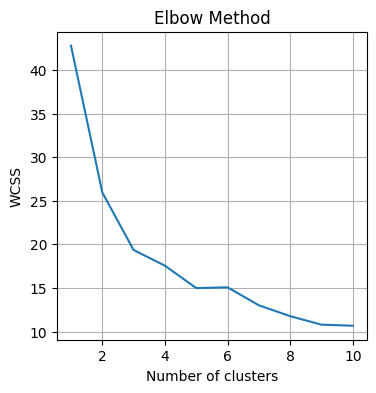

In [57]:
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### silhouette score

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, kmeans_labels)

    print("For n_clusters =",i, "The average silhouette_score is :", silhouette_avg,)
        

For n_clusters = 2 The average silhouette_score is : 0.37671430588173554
For n_clusters = 3 The average silhouette_score is : 0.34265474105126204
For n_clusters = 4 The average silhouette_score is : 0.29655545967060665
For n_clusters = 5 The average silhouette_score is : 0.23981104464522346
For n_clusters = 6 The average silhouette_score is : 0.2461246087924544
For n_clusters = 7 The average silhouette_score is : 0.20388129165571853
For n_clusters = 8 The average silhouette_score is : 0.2411290372608325
For n_clusters = 9 The average silhouette_score is : 0.18663659448568676
For n_clusters = 10 The average silhouette_score is : 0.18987312770029532


### The higher silhouette score the better cluster 

### k = 2 is the best cluster 

# 4.

## K-means algorithm

In [25]:
K_means_model = KMeans(n_clusters=3)

In [26]:
K_means_model.fit(data)

KMeans(n_clusters=3)

In [27]:
cluster_labels = K_means_model.labels_

In [28]:
cluster_labels

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [29]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


### which country belongs to which class?

In [30]:
for i, label in enumerate(cluster_labels): 
    print(f'{country.loc[i]}: cluster {label}')

Afghanistan: cluster 2
Albania: cluster 0
Algeria: cluster 0
Angola: cluster 2
Antigua and Barbuda: cluster 0
Argentina: cluster 0
Armenia: cluster 0
Australia: cluster 1
Austria: cluster 1
Azerbaijan: cluster 0
Bahamas: cluster 0
Bahrain: cluster 0
Bangladesh: cluster 0
Barbados: cluster 0
Belarus: cluster 0
Belgium: cluster 1
Belize: cluster 0
Benin: cluster 2
Bhutan: cluster 0
Bolivia: cluster 0
Bosnia and Herzegovina: cluster 0
Botswana: cluster 0
Brazil: cluster 0
Brunei: cluster 1
Bulgaria: cluster 0
Burkina Faso: cluster 2
Burundi: cluster 2
Cambodia: cluster 0
Cameroon: cluster 2
Canada: cluster 1
Cape Verde: cluster 0
Central African Republic: cluster 2
Chad: cluster 2
Chile: cluster 0
China: cluster 0
Colombia: cluster 0
Comoros: cluster 2
Congo, Dem. Rep.: cluster 2
Congo, Rep.: cluster 2
Costa Rica: cluster 0
Cote d'Ivoire: cluster 2
Croatia: cluster 0
Cyprus: cluster 1
Czech Republic: cluster 1
Denmark: cluster 1
Dominican Republic: cluster 0
Ecuador: cluster 0
Egypt: clus

## silhouette score 

In [53]:
labels_pred = K_means_model.fit_predict(data)
silhouette = silhouette_score(data, labels_pred)
print(silhouette)

0.34265474105126204


# 5.

## scatter plots

### plot 1

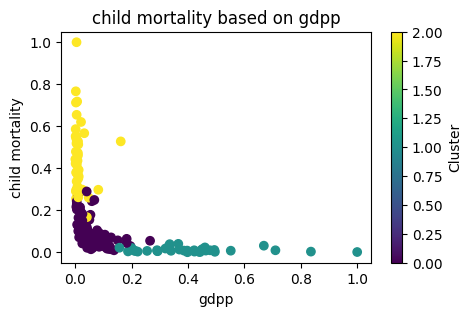

In [31]:
plt.figure(figsize=(5, 3))

plt.scatter(y= data['child_mort'], x= data['gdpp'], c= cluster_labels)

plt.xlabel('gdpp')
plt.ylabel('child mortality')
plt.title('child mortality based on gdpp')

plt.colorbar(label='Cluster')

plt.show()


### plot 2

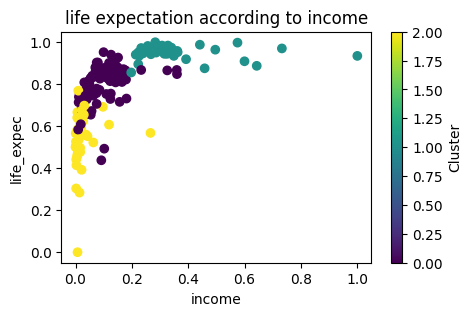

In [32]:
plt.figure(figsize=(5, 3))

plt.scatter(y= data['life_expec'], x= data['income'], c= cluster_labels)

plt.xlabel('income')
plt.ylabel('life_expec')
plt.title('life expectation according to income')

plt.colorbar(label='Cluster')

plt.show()


### plot 3 

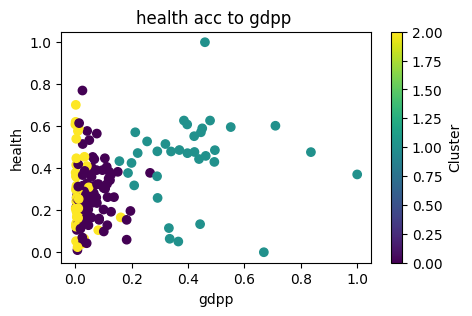

In [33]:
plt.figure(figsize=(5, 3))

plt.scatter(y= data['health'], x= data['gdpp'], c= cluster_labels)

plt.xlabel('gdpp')
plt.ylabel('health')
plt.title('health acc to gdpp ')

plt.colorbar(label='Cluster')

plt.show()


# PCA

## 1.

In [34]:
from sklearn.decomposition import PCA 

In [35]:
pca = PCA()

In [36]:
pca.fit(data)

PCA()

In [37]:
# pca.transform(data)

In [38]:
print(pca.explained_variance_ratio_)

[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


In [39]:
print(pca.singular_values_)

[4.85178527 2.39343183 2.29449189 2.04266175 1.2715817  1.13569691
 0.71378594 0.61641169 0.54501491]


## 2.

## Percentage of Variance Explained by the Components

In [40]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

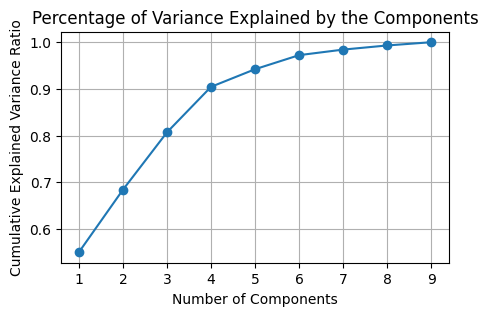

In [41]:
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')


plt.title('Percentage of Variance Explained by the Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#### it seems that 4 number of components can adequately explain the data distribution 

## 3.

### New dataset with reduced dimensions  

In [42]:
pca = PCA(n_components=4)

In [43]:
data_reduced = pca.fit_transform(data)

In [44]:
data_df = pd.DataFrame(data_reduced)

In [45]:
data_df

,0,1,2,3
0,0.599078,0.095490,0.157554,0.024333
1,-0.158474,-0.212092,-0.064189,0.061247
2,-0.003686,-0.135867,-0.134182,-0.133574
3,0.650235,0.275975,-0.142672,-0.156018
4,-0.200711,-0.064662,-0.100715,0.037902
...,...,...,...,...
162,0.160078,-0.029625,-0.121910,0.066099
163,-0.061133,-0.171339,-0.058586,-0.247460
164,-0.115512,-0.032034,-0.195243,0.231993
165,0.332968,-0.019824,-0.029989,-0.105416


## 4. 

### Clustering on reduced dataset

In [46]:
kmeans = KMeans(n_clusters=3)

In [47]:
kmeans.fit(data_reduced)

KMeans(n_clusters=3)

In [48]:
cluster_labels = kmeans.labels_

In [49]:
for i, label in enumerate(cluster_labels): 
    print(f'{country.loc[i]}: cluster {label}')

Afghanistan: cluster 0
Albania: cluster 1
Algeria: cluster 1
Angola: cluster 0
Antigua and Barbuda: cluster 1
Argentina: cluster 1
Armenia: cluster 1
Australia: cluster 2
Austria: cluster 2
Azerbaijan: cluster 1
Bahamas: cluster 1
Bahrain: cluster 1
Bangladesh: cluster 1
Barbados: cluster 1
Belarus: cluster 1
Belgium: cluster 2
Belize: cluster 1
Benin: cluster 0
Bhutan: cluster 1
Bolivia: cluster 1
Bosnia and Herzegovina: cluster 1
Botswana: cluster 1
Brazil: cluster 1
Brunei: cluster 2
Bulgaria: cluster 1
Burkina Faso: cluster 0
Burundi: cluster 0
Cambodia: cluster 1
Cameroon: cluster 0
Canada: cluster 2
Cape Verde: cluster 1
Central African Republic: cluster 0
Chad: cluster 0
Chile: cluster 1
China: cluster 1
Colombia: cluster 1
Comoros: cluster 0
Congo, Dem. Rep.: cluster 0
Congo, Rep.: cluster 0
Costa Rica: cluster 1
Cote d'Ivoire: cluster 0
Croatia: cluster 1
Cyprus: cluster 2
Czech Republic: cluster 2
Denmark: cluster 2
Dominican Republic: cluster 1
Ecuador: cluster 1
Egypt: clus

## silhouette score 

In [54]:
labels_pred = kmeans.fit_predict(data_reduced)
silhouette = silhouette_score(data_reduced, labels_pred)
print(silhouette)

0.39155410911751376


### the clustering on the reduced dataset has better performance in terms of silhouette score 